
## Project Name: Synthetic data generation with CTGAN for Flood Forecasting in Bangladesh


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary libraries

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CTGAN for flood forecasting/FloodTrain.csv")


In [ ]:
display(df.head(10))

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN
9,9,Barisal,1949,10,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,NaN


Checking NaN values in the dataset

In [ ]:
df.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood                16051
dtype: int64

Replacing NaN values with Zero

In [ ]:
df['Flood'] = df['Flood'].fillna(0)

In [ ]:
df['Flood'] = df['Flood'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [ ]:
df

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,0
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,0
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,0
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,0
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1
20540,20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0
20541,20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0
20542,20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0


## About the features in the dataset:
Sl - This appears to be an index or identifier for each row in the dataset.

Station_Names - This column contains the names of weather stations where the data was recorded.

Year - This column represents the year when the weather data was recorded.

Month - Indicates the month of the year when the weather data was recorded.

Max_Temp - Maximum temperature recorded during the month in degrees Celsius.

Min_Temp - Minimum temperature recorded during the month in degrees Celsius.

Rainfall - The amount of rainfall during the month, measured in centimeters (cm).

Relative_Humidity - Relative humidity percentage during the month.

Wind_Speed - Wind speed, typically measured in meters per second (m/s).

Cloud_Coverage - Cloud coverage, often measured in okta, a unit of cloudiness.

Okta is a scale from 0 to 8, with 0 being completely clear and 8 being completely overcast.

Bright_Sunshine - The number of hours of bright sunshine per day.

Station_Number - An identifier for the weather station.

X_COR and Y_COR - These columns seem to represent coordinates (X and Y) of the weather station.

LATITUDE - Latitude of the weather station location, typically in degrees.

LONGITUDE - Longitude of the weather station location, typically in degrees.

ALT - Altitude or elevation of the weather station location, measured in meters.

Period - This might be a combination of the year and month in a specific format, possibly for sorting or labeling purposes.

Flood - A binary column indicating the presence of a flood event, with 1 representing "Yes" and 0 representing "No."

In [ ]:
df=df.drop('Sl', axis=1)

In [ ]:
df

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,0
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,0
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,0
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,0
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0


Checking if the target label is balance or not

In [ ]:
df['Flood'].value_counts()

Flood
0    16412
1     4132
Name: count, dtype: int64

In [ ]:
df_0 = df[df['Flood'] == 0]
df_1 = df[df['Flood'] == 1]

In [ ]:
df_0

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,0
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,0
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,0
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,0
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.400000,1.7,9.100000,41998,734765.4,308914.1,20.87,92.26,4,2013.04,0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.100000,1.7,8.400000,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0


In [ ]:
df_1

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1949.06,1
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.70,90.36,4,1949.07,1
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.70,90.36,4,1949.08,1
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1950.05,1
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1950.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20528,Teknaf,2012,9,33.1,25.7,496.0,87.0,2.000000,5.7,5.900000,41998,734765.4,308914.1,20.87,92.26,4,2012.09,1
20536,Teknaf,2013,5,34.2,24.8,753.0,85.0,3.700000,5.5,3.900000,41998,734765.4,308914.1,20.87,92.26,4,2013.05,1
20537,Teknaf,2013,6,33.2,25.8,821.0,87.0,3.500000,6.2,4.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.06,1
20538,Teknaf,2013,7,32.2,25.3,1127.0,89.0,3.300000,6.5,3.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.07,1


### Installing CTGAN. CTGAN is technique for generating synthetic tabular data based on Deep Learning

In [ ]:
!pip install ctgan

### Table Evaluator will evaluate the quality of the fake generated synthetic data

In [ ]:
!pip install table_evaluator

The dataset include both continuous (Max_Temp, Min_Temp, Rainfall,Relative_Humidity, Wind_Speed,	Cloud_Coverage, Bright_Sunshine, X_COR,	Y_COR, LATITUDE, LONGITUDE, Period) and categorical features ('Station_Names','Year','Month','Station_Number','ALT','Flood').

In [ ]:
df_1.head(5)

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1
16,Barisal,1950,5,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1
17,Barisal,1950,6,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1


In [ ]:
categorical_features = ['Station_Names','Year','Month','Station_Number','ALT','Flood']

### Model Training

1. Set verbose to True, so that we can track the evaluator and disriminator loss value.

2. In case of GAN method, if we get zero for the loss functuion, that doesn't mean necessarily mean the the model will perform well. That's because the most im,portant thing about the loss function is that it should stabilize or it should Plateau.

3. When the Discriminator and Generator loss function starts to stabilize, it means that the model is doing great.

4. It's okay to have a negative loss value for Generator.


In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df_1, categorical_features, epochs = 200)

Gen. (-0.33) | Discrim. (-0.59): 100%|██████████| 200/200 [03:40<00:00,  1.10s/it]


### Synthetic data generation

Generating some synthetic data. Used sample method to generate around 12280 synthetic data

In [ ]:
samples = ctgan.sample(12280)

In [ ]:
samples

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Sylhet,1979,6,33.492263,25.431504,265.086823,87.987904,0.107079,1.582055,5.572339,41950,520137.272032,649561.078823,22.828203,90.475122,19,2007.140981,1
1,Teknaf,1981,4,34.027096,25.636992,382.725631,87.110386,0.668749,6.174987,5.847364,41966,658935.293107,483440.486152,22.868431,90.218281,7,1990.359453,1
2,Chittagong (IAP-Patenga),1949,7,37.193043,25.060131,382.008394,81.412552,1.915393,5.841795,5.594625,41984,753017.427014,714289.152557,23.918221,90.599199,35,1953.028275,1
3,Barisal,1984,6,36.474649,26.479172,274.689840,80.520700,2.064730,6.167895,3.684312,41950,356459.590562,845248.188014,23.562699,90.107855,10,1976.028012,1
4,Comilla,2010,8,34.339012,22.930409,554.478398,83.823627,1.361194,6.206497,2.728894,41965,533908.643695,506954.215009,22.418537,90.978295,4,2007.132199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,Feni,1965,8,34.007299,24.687410,595.229106,85.615369,0.445494,5.216511,4.546796,41941,624028.961233,519649.430235,22.572120,91.377070,6,1989.990081,1
12276,Bhola,2010,5,32.278428,26.362895,565.029516,87.635559,0.204196,4.368850,6.723060,41943,543638.053131,492667.871152,25.044779,90.259082,3,1981.345109,1
12277,Cox's Bazar,1998,10,34.489768,23.290455,1206.675216,88.909311,1.077365,5.807660,5.056006,41915,696368.001839,408909.861438,22.415494,90.227257,9,1988.728600,1
12278,Bhola,1949,9,36.165916,25.507105,774.087573,79.899613,0.648245,5.761135,4.992671,41950,526853.721603,833288.574157,21.094369,90.118034,20,2009.610242,1


### Evaluation

Evaluate to see and compare real data with the synthetic data to see, how is the quality of the data that we generated.

(4132, 18) (12280, 18)


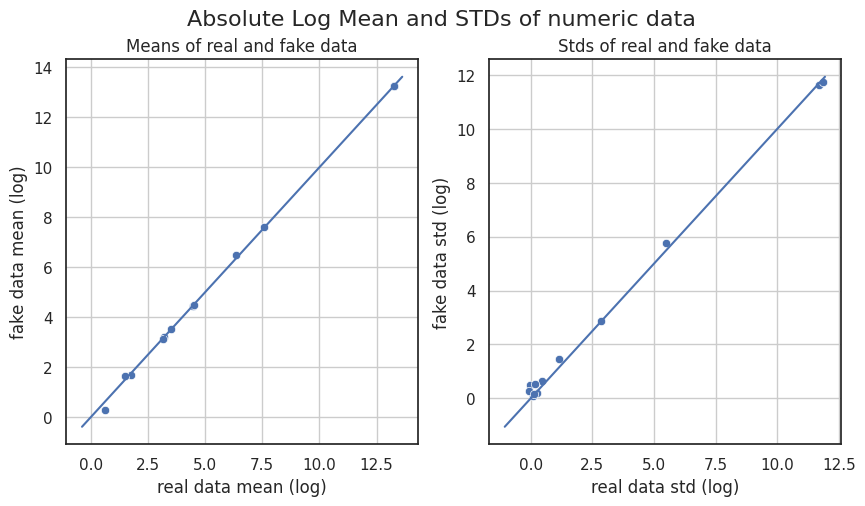

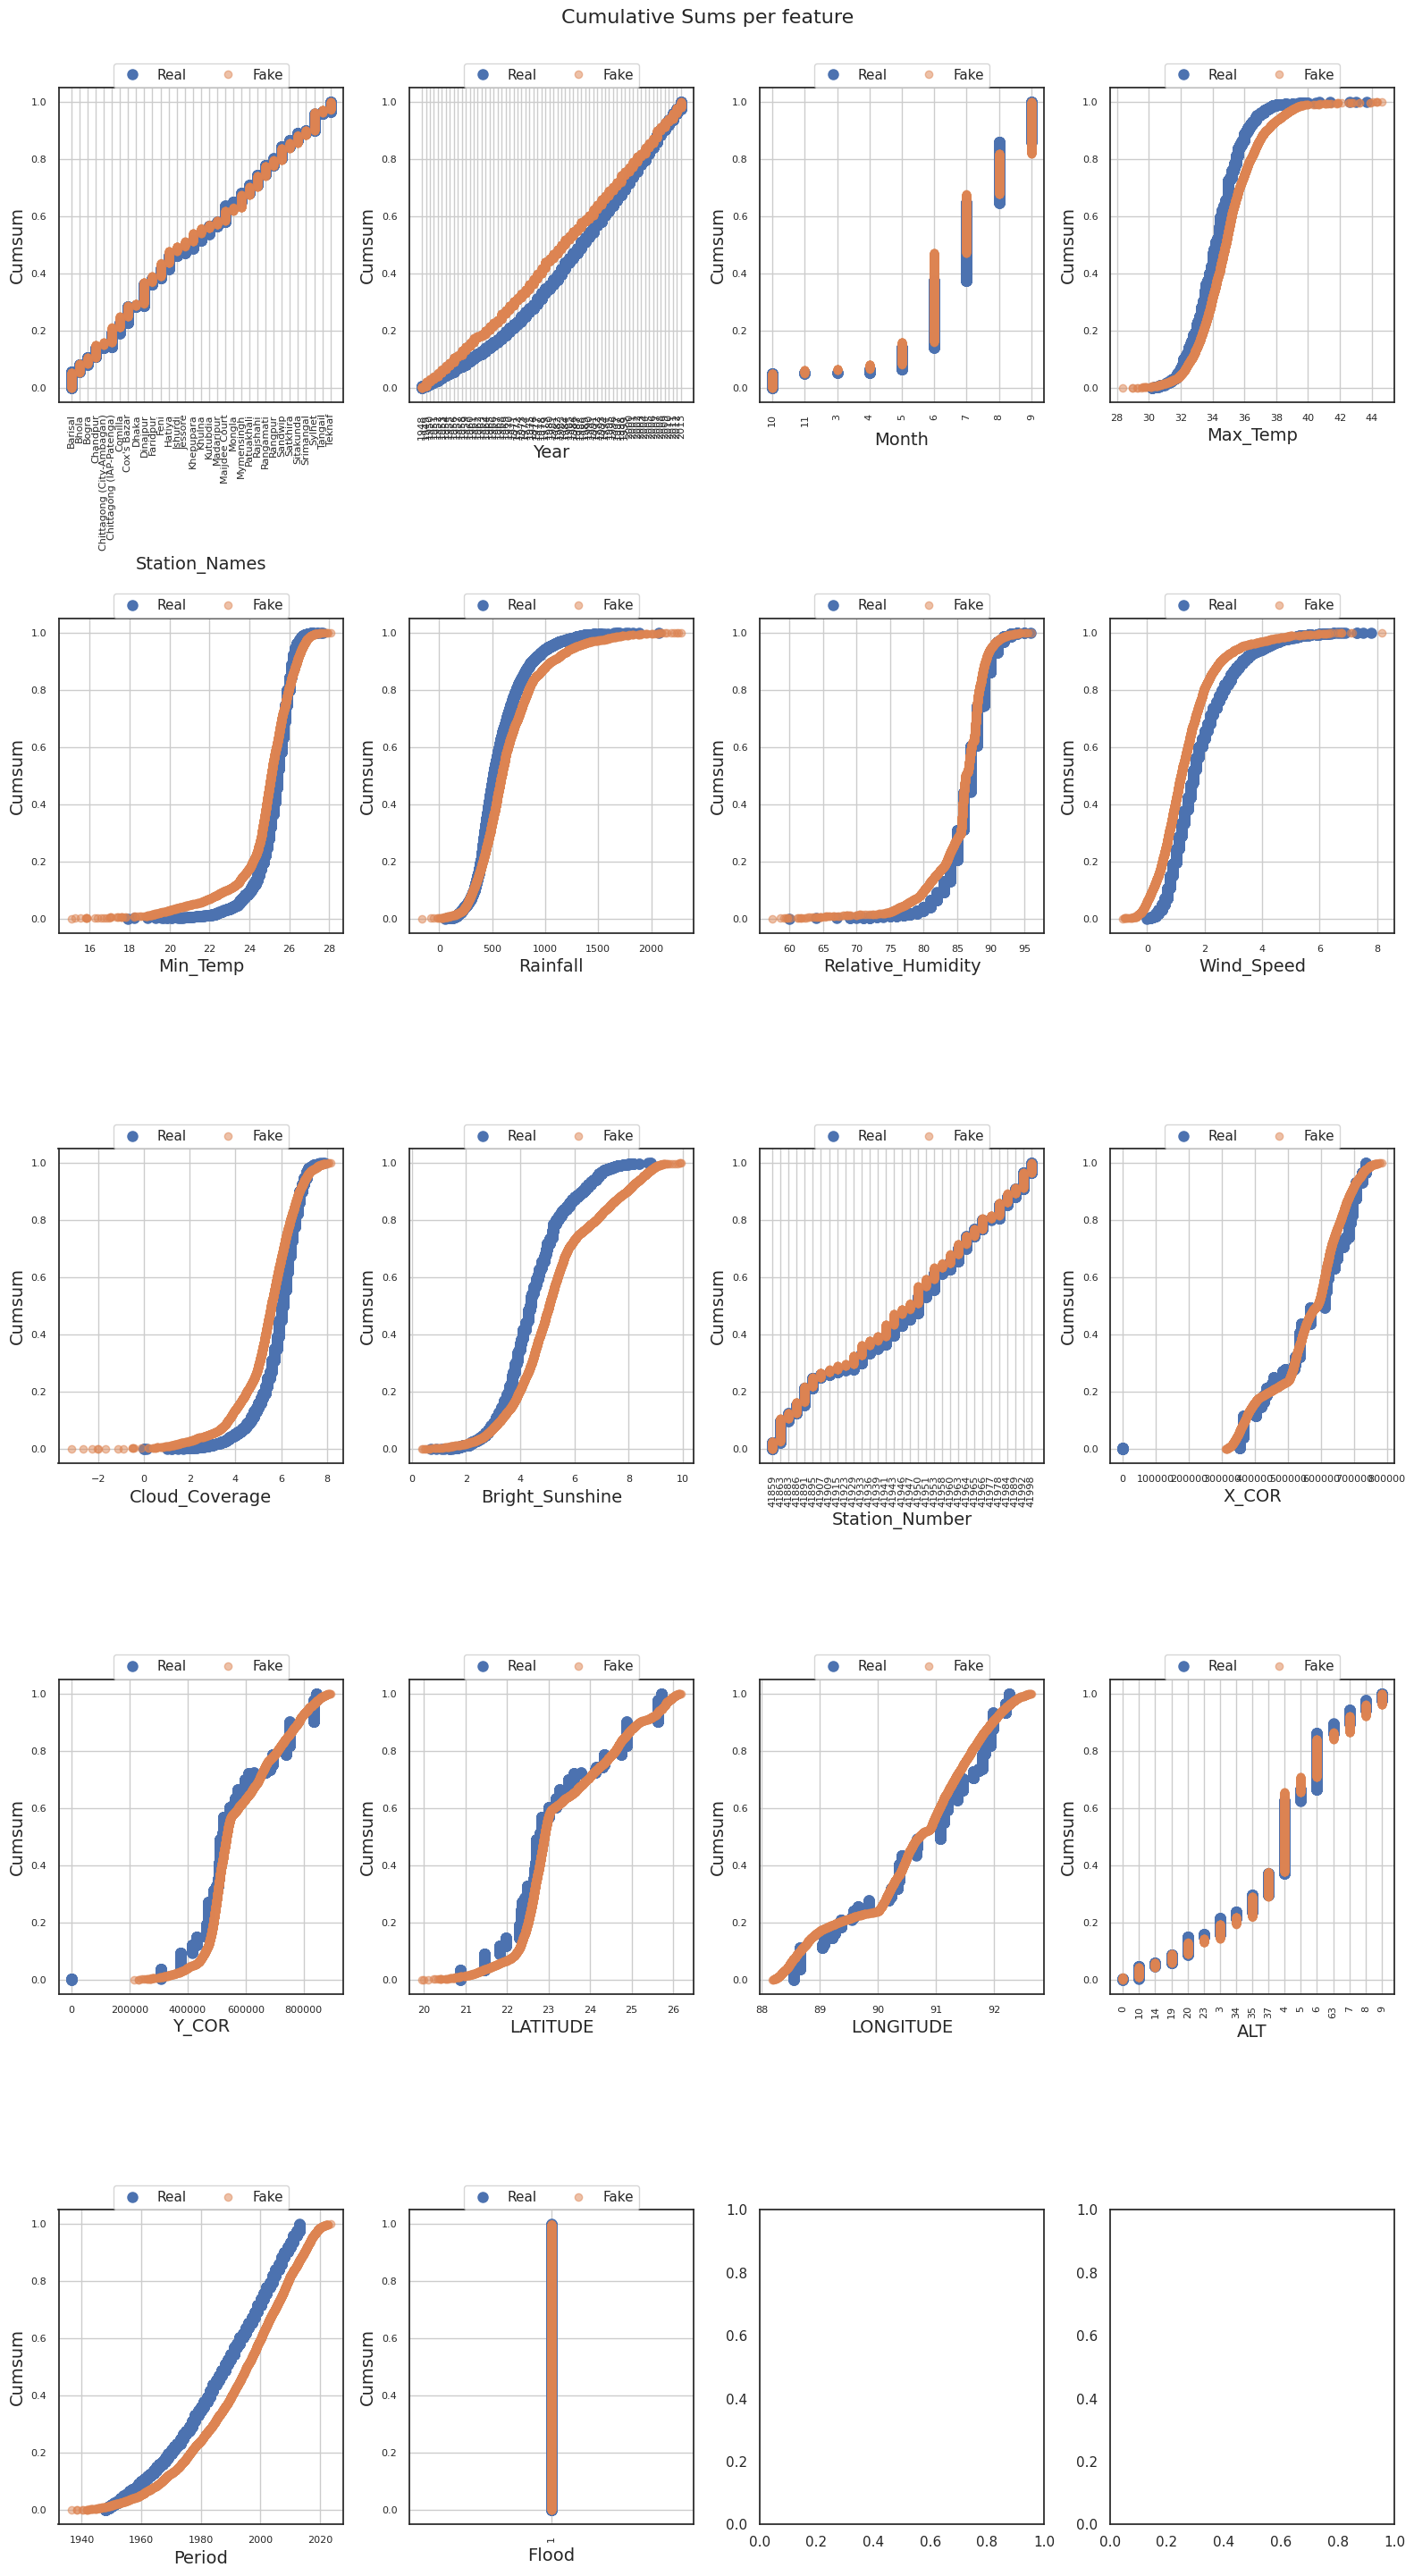

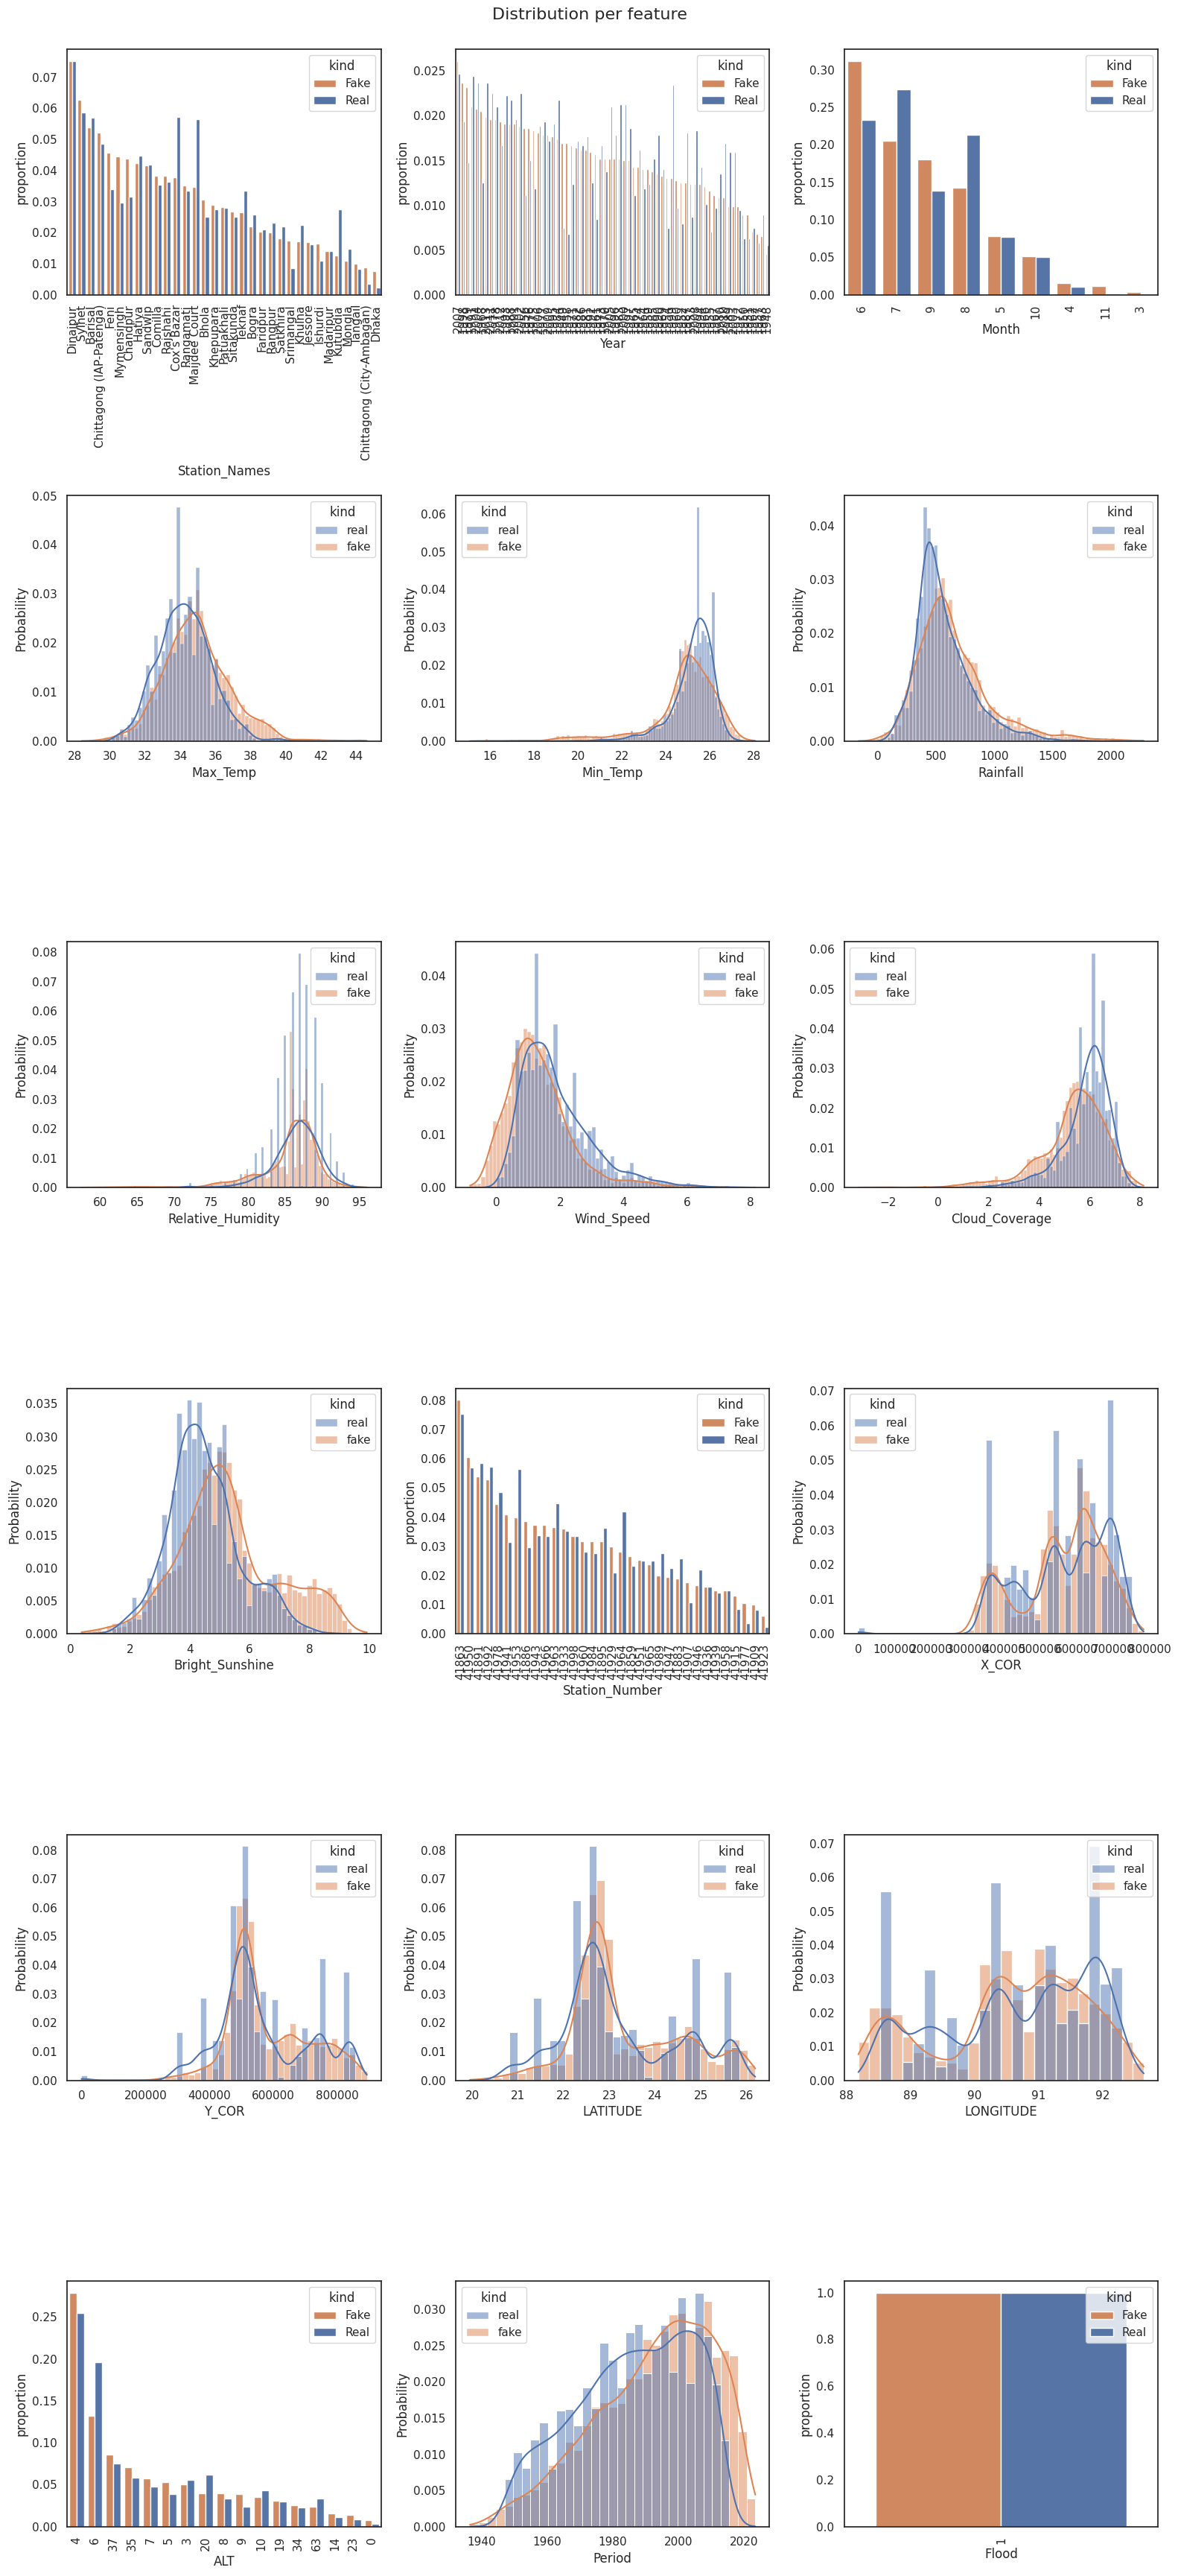

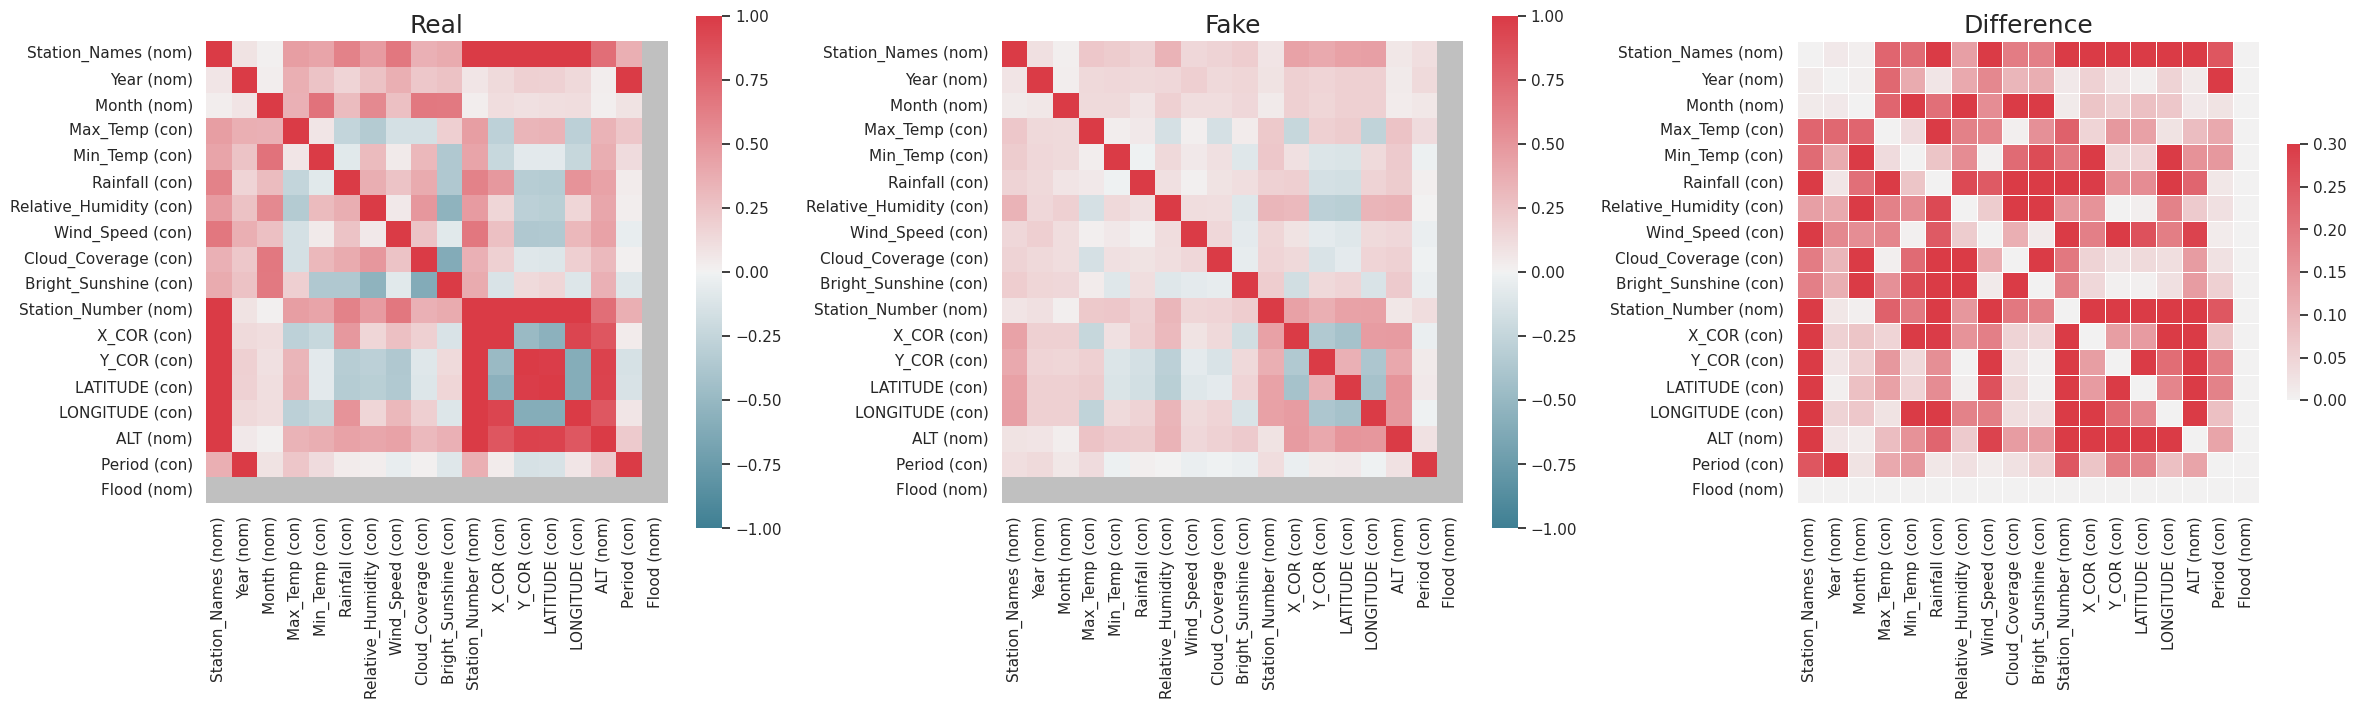

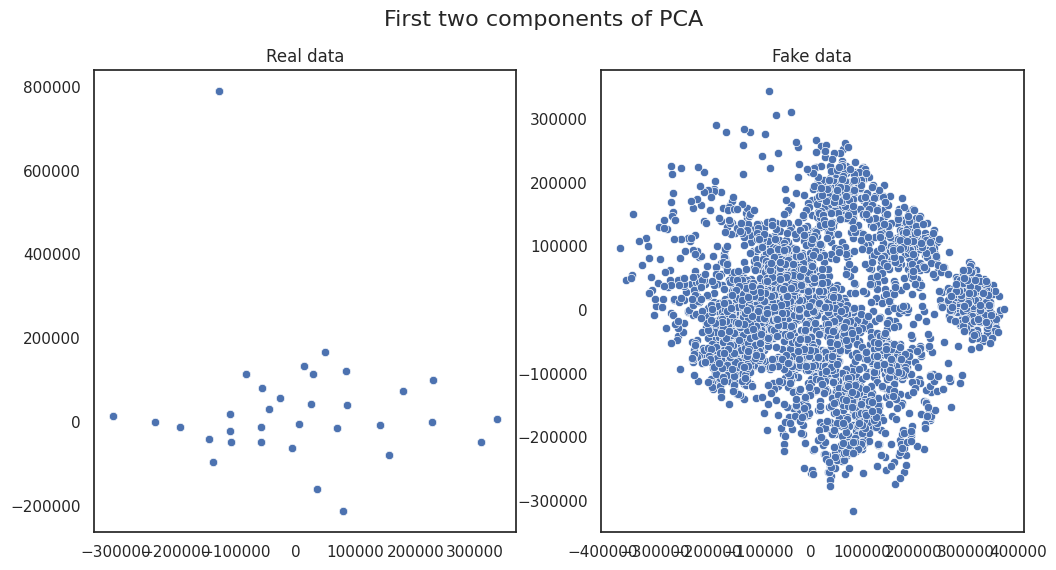

In [ ]:
from table_evaluator import TableEvaluator

print(df_1.shape, samples.shape)
table_evaluator =  TableEvaluator(df_1, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

4132 row of real data and 12280 rows of generated synthetic data.

Absolute log mean and standard deviation is pretty good for the real and the synthetic data because the blue circle is pretty close to the line. That means they have a very similar values.

In cumulative Sums per feature:

1. Except for Bright_sunshine and Wind_speed, rest of the features are mostly the same.
2. However, for Bright_sunshine and Wind_speed, it could be closer if we run more epochs.
3. For Categorical features, the results are much better than the Continuous features.
4. Synthetic data couldn't generate more outliers.


In [ ]:
con_df = pd.concat([df_1, samples], ignore_index=True)

In [ ]:
con_df

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Barisal,1949,6,34.400000,25.700000,512.000000,80.000000,1.631481,5.600000,4.072340,41950,536809.800000,510151.900000,22.700000,90.360000,4,1949.060000,1
1,Barisal,1949,7,33.400000,25.800000,575.000000,85.000000,1.570370,5.400000,3.738298,41950,536809.800000,510151.900000,22.700000,90.360000,4,1949.070000,1
2,Barisal,1949,8,33.500000,25.700000,349.000000,86.000000,1.329630,5.600000,4.272340,41950,536809.800000,510151.900000,22.700000,90.360000,4,1949.080000,1
3,Barisal,1950,5,36.100000,25.500000,87.000000,78.000000,1.703704,4.800000,7.046809,41950,536809.800000,510151.900000,22.700000,90.360000,4,1950.050000,1
4,Barisal,1950,6,33.900000,26.000000,476.000000,87.000000,1.631481,7.200000,4.072340,41950,536809.800000,510151.900000,22.700000,90.360000,4,1950.060000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16407,Feni,1965,8,34.007299,24.687410,595.229106,85.615369,0.445494,5.216511,4.546796,41941,624028.961233,519649.430235,22.572120,91.377070,6,1989.990081,1
16408,Bhola,2010,5,32.278428,26.362895,565.029516,87.635559,0.204196,4.368850,6.723060,41943,543638.053131,492667.871152,25.044779,90.259082,3,1981.345109,1
16409,Cox's Bazar,1998,10,34.489768,23.290455,1206.675216,88.909311,1.077365,5.807660,5.056006,41915,696368.001839,408909.861438,22.415494,90.227257,9,1988.728600,1
16410,Bhola,1949,9,36.165916,25.507105,774.087573,79.899613,0.648245,5.761135,4.992671,41950,526853.721603,833288.574157,21.094369,90.118034,20,2009.610242,1


In [ ]:
import pandas as pd
from sklearn.utils import shuffle

concatenated_df = pd.concat([con_df, df_0])

shuffled_df = shuffle(concatenated_df).reset_index(drop=True)

In [ ]:
shuffled_df

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,Rangpur,1961,7,33.784209,15.999886,356.257716,83.110634,2.483369,5.644097,2.399624,41909,684563.09271,462703.467121,22.162049,90.215294,6,2001.103042,1
1,Sylhet,1977,6,33.400000,23.600000,787.000000,89.000000,0.800000,7.100000,3.200000,41891,694533.20000,752277.900000,24.880000,91.930000,35,1977.060000,1
2,Madaripur,2011,3,35.200000,19.500000,20.000000,72.000000,1.700000,1.800000,7.700000,41939,518762.70000,561770.300000,23.170000,90.180000,5,2011.030000,0
3,Rangamati,2012,2,35.000000,13.700000,0.000000,63.000000,2.100000,0.300000,8.700000,41966,725903.30000,508021.900000,22.670000,92.200000,63,2012.020000,0
4,Bhola,1997,1,27.500000,11.600000,1.000000,79.000000,0.200000,1.100000,5.400000,41951,567637.60000,510271.800000,22.700000,90.660000,5,1997.010000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32819,Cox's Bazar,2000,3,35.800000,21.200000,96.000000,76.000000,1.600000,2.300000,8.200000,41992,705183.00000,374324.600000,21.460000,91.980000,4,2000.030000,0
32820,Cox's Bazar,1982,12,29.500000,15.000000,0.000000,72.000000,1.000000,0.300000,9.600000,41992,705183.00000,374324.600000,21.460000,91.980000,4,1982.120000,0
32821,Hatiya,2005,6,35.000000,26.900000,420.000000,85.000000,2.700000,5.700000,4.300000,41963,616159.20000,465295.100000,22.290000,91.130000,4,2005.060000,1
32822,Satkhira,1980,2,32.300000,16.900000,166.000000,69.000000,0.200000,1.000000,7.953333,41946,404211.70000,508367.200000,22.680000,89.070000,6,1980.020000,0


In [ ]:
df=shuffled_df

In [ ]:
df['Flood'].value_counts()

Flood
1    16412
0    16412
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['Station_Names']

for col in columns:
    df[col]=le.fit_transform(df[col])

print(le.classes_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


In [ ]:
df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,25,1961,7,33.784209,15.999886,356.257716,83.110634,2.483369,5.644097,2.399624,41909,684563.09271,462703.467121,22.162049,90.215294,6,2001.103042,1
1,30,1977,6,33.400000,23.600000,787.000000,89.000000,0.800000,7.100000,3.200000,41891,694533.20000,752277.900000,24.880000,91.930000,35,1977.060000,1
2,18,2011,3,35.200000,19.500000,20.000000,72.000000,1.700000,1.800000,7.700000,41939,518762.70000,561770.300000,23.170000,90.180000,5,2011.030000,0
3,24,2012,2,35.000000,13.700000,0.000000,63.000000,2.100000,0.300000,8.700000,41966,725903.30000,508021.900000,22.670000,92.200000,63,2012.020000,0
4,1,1997,1,27.500000,11.600000,1.000000,79.000000,0.200000,1.100000,5.400000,41951,567637.60000,510271.800000,22.700000,90.660000,5,1997.010000,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Flood', axis=1))

StandardScaler()

In [ ]:
scaled_features =scaler.transform(df.drop('Flood', axis=1))

In [ ]:
scaled_features

array([[ 1.01281076, -1.29783963,  0.08288373, ..., -0.26901752,
        -0.54242337,  0.71689712],
       [ 1.5358668 , -0.41001804, -0.26162374, ...,  1.25024682,
         1.56376772, -0.61634831],
       [ 0.2805323 ,  1.47660285, -1.29514615, ..., -0.30028861,
        -0.61505065,  1.26737119],
       ...,
       [-0.34713494,  1.14366975, -0.26162374, ...,  0.54143062,
        -0.68767793,  0.9363201 ],
       [ 1.22203317, -0.24355149, -1.63965362, ..., -1.28377109,
        -0.54242337, -0.45220908],
       [ 1.32664438,  0.92171436, -1.98416108, ...,  0.99330095,
        -0.68767793,  0.7117377 ]])

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [ ]:
df_feat

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,1.012811,-1.297840,0.082884,-0.078778,-1.479729,-0.024169,0.186637,1.032668,0.713454,-1.978052,-0.711763,1.137597,-0.907422,-1.000816,-0.269018,-0.542423,0.716897
1,1.535867,-0.410018,-0.261624,-0.220591,0.243222,1.221701,1.005543,-0.561568,1.424793,-1.536544,-1.186783,1.223916,1.328499,1.305967,1.250247,1.563768,-0.616348
2,0.280532,1.476603,-1.295146,0.443797,-0.686251,-0.996754,-1.358278,0.290778,-1.164732,0.945776,0.079936,-0.297872,-0.142487,-0.145347,-0.300289,-0.615051,1.267371
3,0.908200,1.532092,-1.639654,0.369976,-2.001115,-1.054602,-2.609713,0.669598,-1.897617,1.497403,0.792466,1.495512,-0.557500,-0.569707,1.489472,3.597332,1.322269
4,-1.497858,0.699759,-1.984161,-2.398310,-2.477187,-1.051709,-0.384940,-1.129798,-1.506745,-0.322965,0.396616,0.125278,-0.540127,-0.544246,0.125001,-0.615051,0.489928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32819,-0.870191,0.866226,-1.295146,0.665260,-0.300860,-0.776933,-0.802085,0.196072,-0.920437,1.221589,1.478606,1.316120,-1.589830,-1.596660,1.294548,-0.687678,0.657394
32820,-0.870191,-0.132574,1.805421,-1.660101,-1.706404,-1.054602,-1.358278,-0.372158,-1.897617,1.993867,1.478606,1.316120,-1.589830,-1.596660,1.294548,-0.687678,-0.335759
32821,-0.347135,1.143670,-0.261624,0.369976,0.991334,0.160197,0.449350,1.237828,0.740768,-0.929754,0.713296,0.545369,-0.887411,-0.892221,0.541431,-0.687678,0.936320
32822,1.222033,-0.243551,-1.639654,-0.626607,-1.275673,-0.574467,-1.775423,-1.129798,-1.555604,1.085522,0.264666,-1.289633,-0.554834,-0.561220,-1.283771,-0.542423,-0.452209


In [ ]:
df_feat = pd.concat([pd.DataFrame(df_feat), pd.DataFrame(df['Flood'])], axis=1)

In [ ]:
df_feat

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,1.012811,-1.297840,0.082884,-0.078778,-1.479729,-0.024169,0.186637,1.032668,0.713454,-1.978052,-0.711763,1.137597,-0.907422,-1.000816,-0.269018,-0.542423,0.716897,1
1,1.535867,-0.410018,-0.261624,-0.220591,0.243222,1.221701,1.005543,-0.561568,1.424793,-1.536544,-1.186783,1.223916,1.328499,1.305967,1.250247,1.563768,-0.616348,1
2,0.280532,1.476603,-1.295146,0.443797,-0.686251,-0.996754,-1.358278,0.290778,-1.164732,0.945776,0.079936,-0.297872,-0.142487,-0.145347,-0.300289,-0.615051,1.267371,0
3,0.908200,1.532092,-1.639654,0.369976,-2.001115,-1.054602,-2.609713,0.669598,-1.897617,1.497403,0.792466,1.495512,-0.557500,-0.569707,1.489472,3.597332,1.322269,0
4,-1.497858,0.699759,-1.984161,-2.398310,-2.477187,-1.051709,-0.384940,-1.129798,-1.506745,-0.322965,0.396616,0.125278,-0.540127,-0.544246,0.125001,-0.615051,0.489928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32819,-0.870191,0.866226,-1.295146,0.665260,-0.300860,-0.776933,-0.802085,0.196072,-0.920437,1.221589,1.478606,1.316120,-1.589830,-1.596660,1.294548,-0.687678,0.657394,0
32820,-0.870191,-0.132574,1.805421,-1.660101,-1.706404,-1.054602,-1.358278,-0.372158,-1.897617,1.993867,1.478606,1.316120,-1.589830,-1.596660,1.294548,-0.687678,-0.335759,0
32821,-0.347135,1.143670,-0.261624,0.369976,0.991334,0.160197,0.449350,1.237828,0.740768,-0.929754,0.713296,0.545369,-0.887411,-0.892221,0.541431,-0.687678,0.936320,1
32822,1.222033,-0.243551,-1.639654,-0.626607,-1.275673,-0.574467,-1.775423,-1.129798,-1.555604,1.085522,0.264666,-1.289633,-0.554834,-0.561220,-1.283771,-0.542423,-0.452209,0


In [ ]:
df_feat['Flood'].value_counts()

Flood
1    16412
0    16412
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_feat.drop(['Station_Names','Year', 'Month', 'Max_Temp', 'Wind_Speed','Station_Number','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period' ,'Flood'],axis=1)
y = df['Flood']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_test.shape

(6565, 5)

In [ ]:
X

,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine
0,-1.479729,-0.024169,0.186637,0.713454,-1.978052
1,0.243222,1.221701,1.005543,1.424793,-1.536544
2,-0.686251,-0.996754,-1.358278,-1.164732,0.945776
3,-2.001115,-1.054602,-2.609713,-1.897617,1.497403
4,-2.477187,-1.051709,-0.384940,-1.506745,-0.322965
...,...,...,...,...,...
32819,-0.300860,-0.776933,-0.802085,-0.920437,1.221589
32820,-1.706404,-1.054602,-1.358278,-1.897617,1.993867
32821,0.991334,0.160197,0.449350,0.740768,-0.929754
32822,-1.275673,-0.574467,-1.775423,-1.555604,1.085522


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,pred)
print(accuracy)

0.9445904261396093


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knn_acc=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(knn,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
knn_acc

array([0.92955065, 0.92574257, 0.9221249 , 0.926885  , 0.92420491])

In [ ]:
knn_acc.mean()

0.9257016071939586

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9277989337395278


In [ ]:
confusion_matrix_ = confusion_matrix(y_test, pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, pred))


confusion_matrix: 
 [[3052  232]
 [ 242 3039]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3284
           1       0.93      0.93      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [ ]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)


True Negatives =  3052
False Negatives =  242
False Positives =  232
True Positives =  3039


In [ ]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.07


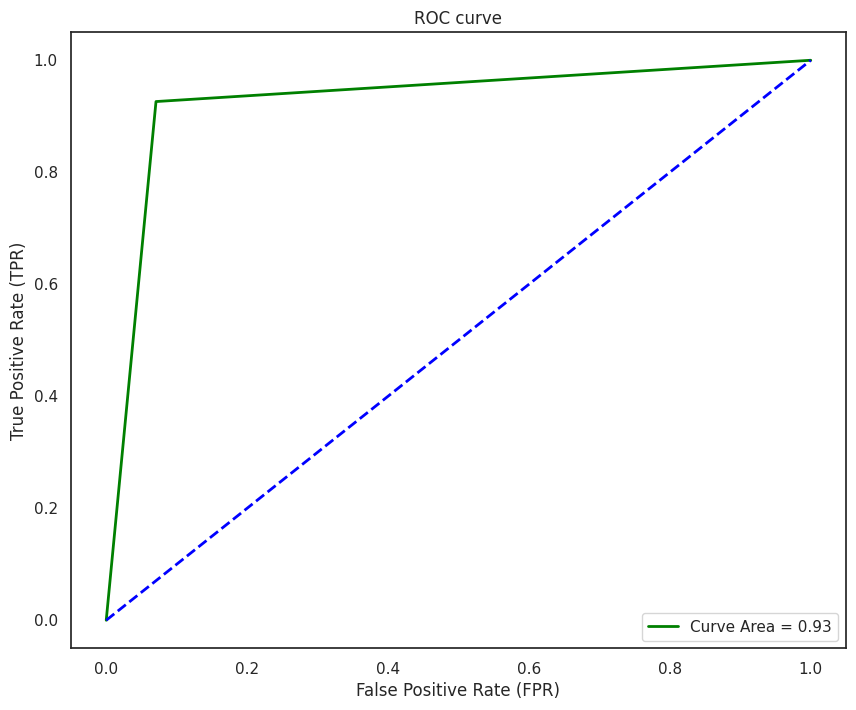

In [ ]:
fpr, tpr, thr = roc_curve(y_test, pred)
auc = np.round(roc_auc_score(y_test, pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
knn_params = {
    "n_neighbors": range(1, 20, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 35, 5)

}

knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

kfinal_model = knn.set_params(**grid_result.best_params_)
kfinal_model.fit(X_train,y_train)
kpred = kfinal_model.predict(X_test)

print(classification_report(y_test, kpred))
print(confusion_matrix(y_test, kpred))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3284
           1       0.94      0.93      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565

[[3092  192]
 [ 244 3037]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


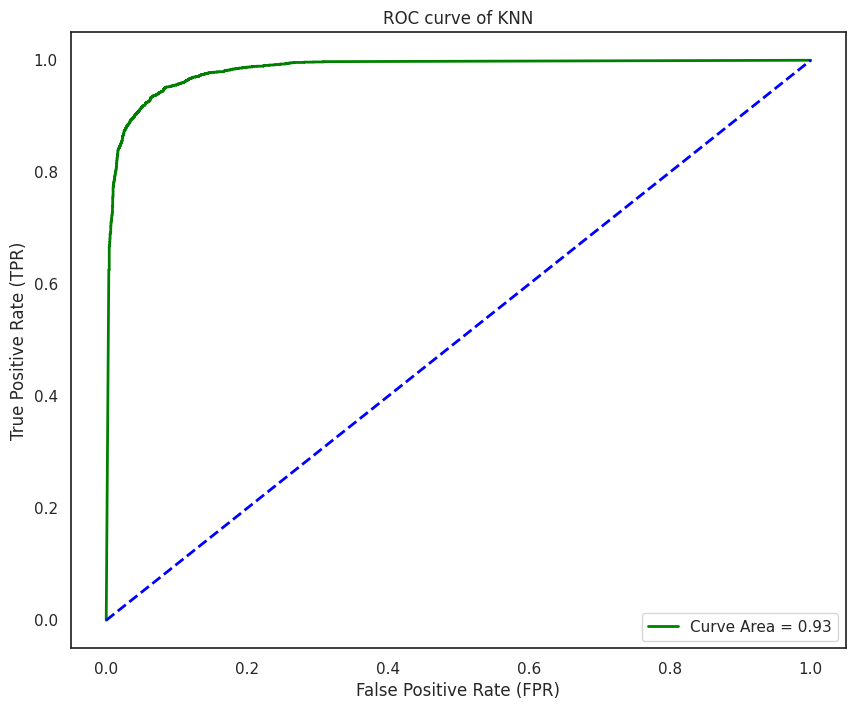

In [ ]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, kpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve of KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predh = kfinal_model.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,predh)
print(accuracy)

0.9999238356373054


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
knnh_acc=cross_val_score(kfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
knnh_proba=cross_val_predict(kfinal_model,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
knnh_acc

array([0.93602437, 0.93431074, 0.93050267, 0.9322163 , 0.93067987])

In [ ]:
knnh_acc.mean()

0.932746789027818

In [ ]:
pred = kfinal_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)

0.9335872048743336


In [ ]:
confusion_matrix_ = confusion_matrix(y_test,pred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test,pred))

confusion_matrix: 
 [[3092  192]
 [ 244 3037]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3284
           1       0.94      0.93      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [ ]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3092
False Negatives =  244
False Positives =  192
True Positives =  3037


In [ ]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.06


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

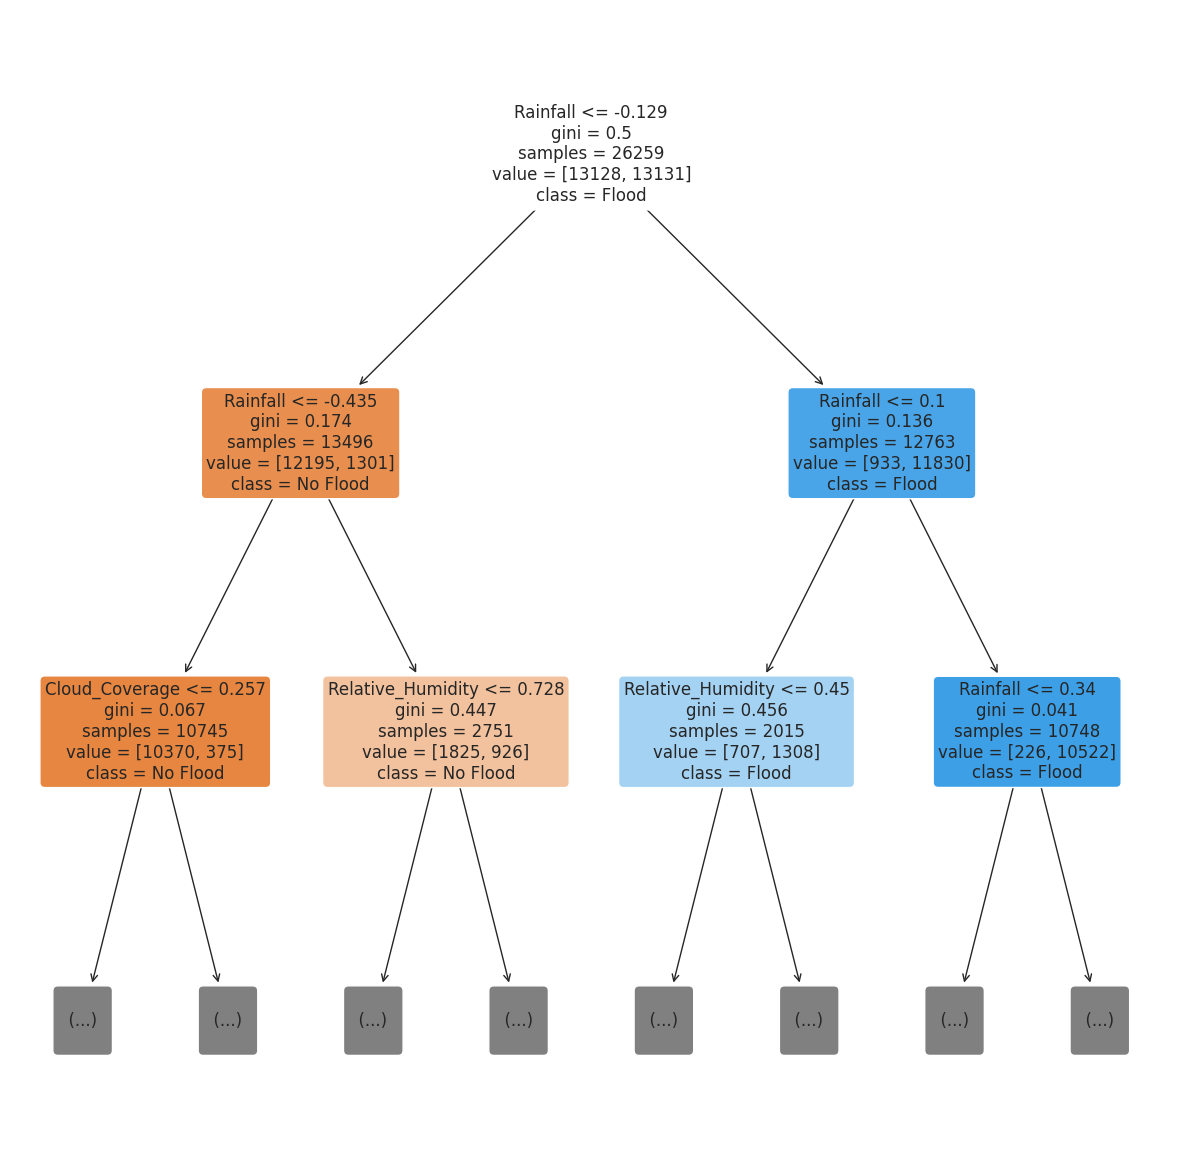

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dtree, filled=True, rounded=True, class_names = ["No Flood", 'Flood'],
         feature_names = X.columns, max_depth=2, fontsize=12)

plt.show()

In [ ]:
dpred = dtree.predict(X_test)

In [ ]:
confusion_matrix_ = confusion_matrix(y_test, dpred)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpred))

confusion_matrix: 
 [[3054  230]
 [ 205 3076]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3284
           1       0.93      0.94      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [ ]:
DTN = confusion_matrix_[0,0]
print("True Negatives = ", DTN)

DFN = confusion_matrix_[1,0]
print("False Negatives = ", DFN)

DFP = confusion_matrix_[0,1]
print("False Positives = ", DFP)

DTP = confusion_matrix_[1,1]
print("True Positives = ", DTP)

True Negatives =  3054
False Negatives =  205
False Positives =  230
True Positives =  3076


In [ ]:
accuracy = accuracy_score(y_test,dpred)
print(accuracy)

0.9337395277989338


In [ ]:
DTPR = np.round(DTP/(DTP+DFN), 2)
DFPR = np.round(DFP/(DFP+DTN), 2)

print("True Positive Rate = ", DTPR)
print("False Positive Rate = ", DFPR)

True Positive Rate =  0.94
False Positive Rate =  0.07


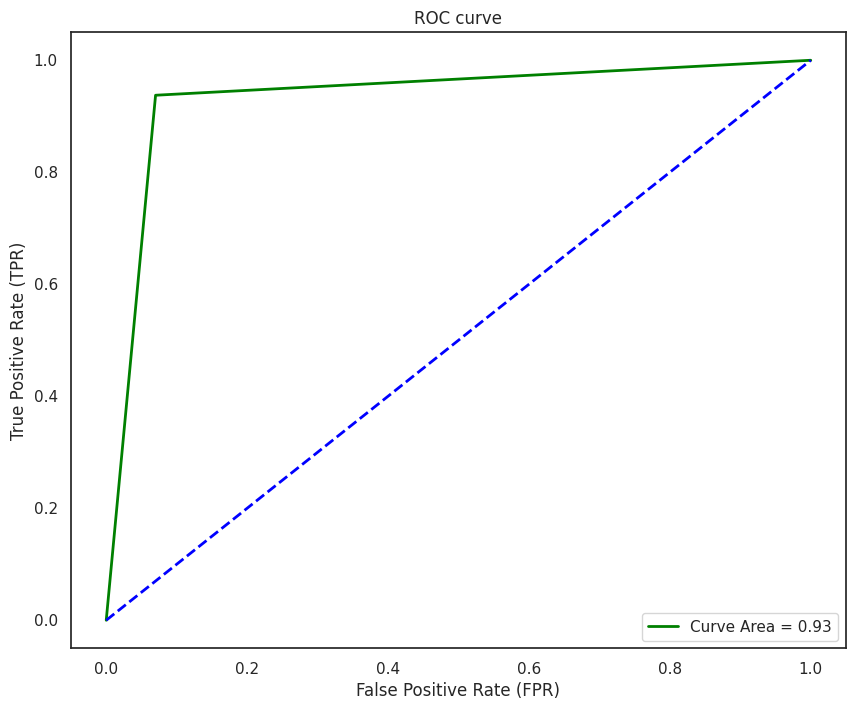

In [ ]:
fpr, tpr, thr = roc_curve(y_test, dpred)
auc = np.round(roc_auc_score(y_test, dpred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
seed=50
dtree_params = {
    "max_depth": range(1, 20, 2),
    "criterion": ['gini','entropy'],
    "max_features": ['auto'],
    "max_depth": range(3,20 , 1),

}

dtree = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_params, n_jobs=1, cv=cv, scoring="accuracy", error_score=0)
grid_result = grid_search.fit(X_train,y_train)

dfinal_model = dtree.set_params(**grid_result.best_params_)
dfinal_model.fit(X_train,y_train)
dpredh = dfinal_model.predict(X_test)

print(classification_report(y_test, dpredh))
print(confusion_matrix(y_test, dpredh))

print(grid_result.best_params_)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3284
           1       0.94      0.92      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565

[[3089  195]
 [ 266 3015]]
{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}


In [ ]:
dpredh = dfinal_model.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,dpredh)
print(accuracy)

0.9543775467458776


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
dtc_acc=cross_val_score(dfinal_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
dtc_proba=cross_val_predict(dfinal_model,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
dtc_acc

array([0.93450114, 0.92859863, 0.92345773, 0.91831683, 0.92820415])

In [ ]:
dtc_acc.mean()

0.9266156970354757

In [ ]:
dpredht = dfinal_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,dpredht)
print(accuracy)

0.9297791317593298


In [ ]:
confusion_matrix_ = confusion_matrix(y_test, dpredht)
print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, dpredht))

confusion_matrix: 
 [[3089  195]
 [ 266 3015]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3284
           1       0.94      0.92      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



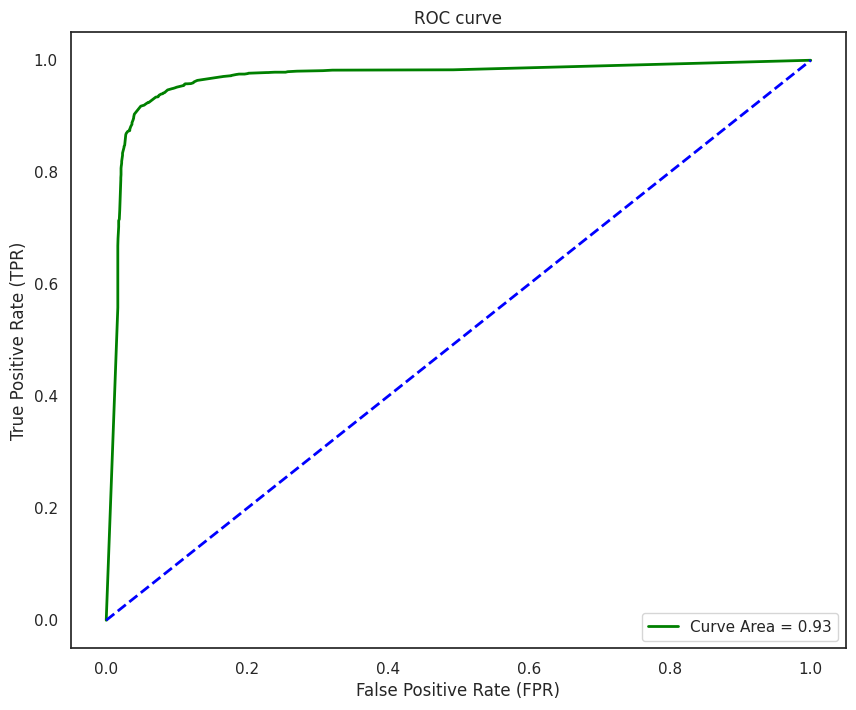

In [ ]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, dpredht), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

In [ ]:
rfc_pred = rfc.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,rfc_pred)
print(accuracy)

0.9999238356373054


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
rfc_acc=cross_val_score(rfc,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
rfc_proba=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
rfc_acc

array([0.95468393, 0.95106626, 0.94630617, 0.94840061, 0.94781946])

In [ ]:
rfc_acc.mean()

0.9496552863466473

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,rfc_pred)
print(accuracy)

0.952018278750952


In [ ]:
confusion_matrix_ = confusion_matrix(y_test, rfc_pred)

print('confusion_matrix: \n', confusion_matrix_)
print(classification_report(y_test, rfc_pred))

confusion_matrix: 
 [[3126  158]
 [ 157 3124]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3284
           1       0.95      0.95      0.95      3281

    accuracy                           0.95      6565
   macro avg       0.95      0.95      0.95      6565
weighted avg       0.95      0.95      0.95      6565



In [ ]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3126
False Negatives =  157
False Positives =  158
True Positives =  3124


In [ ]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.95
False Positive Rate =  0.05


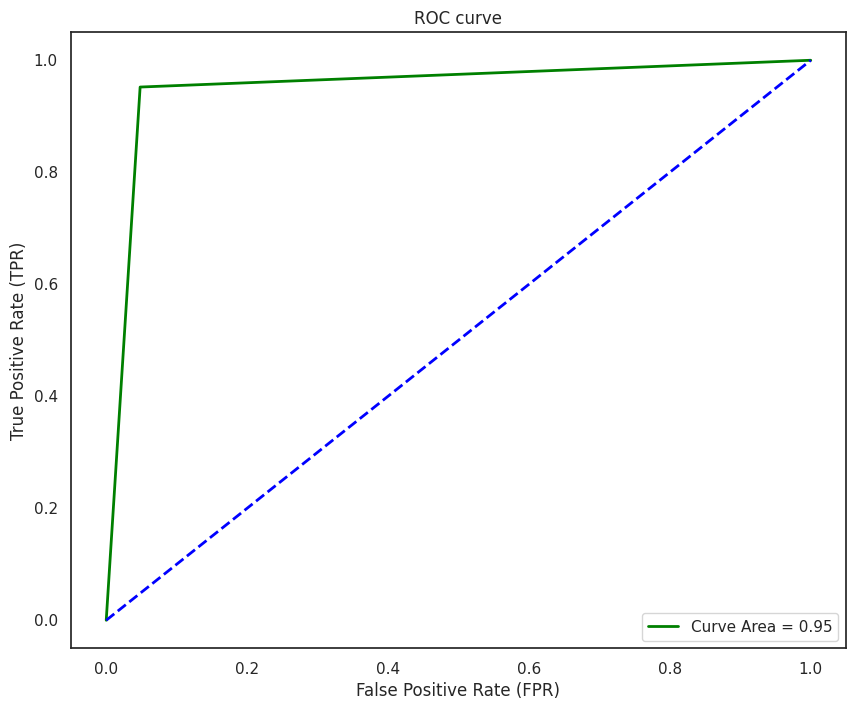

In [ ]:
fpr, tpr, thr = roc_curve(y_test, rfc_pred)
auc = np.round(roc_auc_score(y_test, rfc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC
svc_algo = SVC(C=1000,gamma=1,random_state=50,probability=True)

In [ ]:
svc_algo.fit(X_train,y_train)

SVC(C=1000, gamma=1, probability=True, random_state=50)

In [ ]:
svc_pred = svc_algo.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,svc_pred)
print(accuracy)

0.9482082333676073


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc=cross_val_score(svc_algo,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
svc_proba=cross_val_predict(svc_algo,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
svc_acc

array([0.93164509, 0.92783701, 0.92821782, 0.92269612, 0.92553799])

In [ ]:
svc_acc.mean()

0.9271868064734488

In [ ]:
svc_pred = svc_algo.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,svc_pred)
print(accuracy)

0.9253617669459253


In [ ]:
confusion_matrix_ = confusion_matrix(y_test, svc_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, svc_pred))

confusion_matrix: 
 [[3051  233]
 [ 257 3024]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3284
           1       0.93      0.92      0.93      3281

    accuracy                           0.93      6565
   macro avg       0.93      0.93      0.93      6565
weighted avg       0.93      0.93      0.93      6565



In [ ]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3051
False Negatives =  257
False Positives =  233
True Positives =  3024


In [ ]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.92
False Positive Rate =  0.07


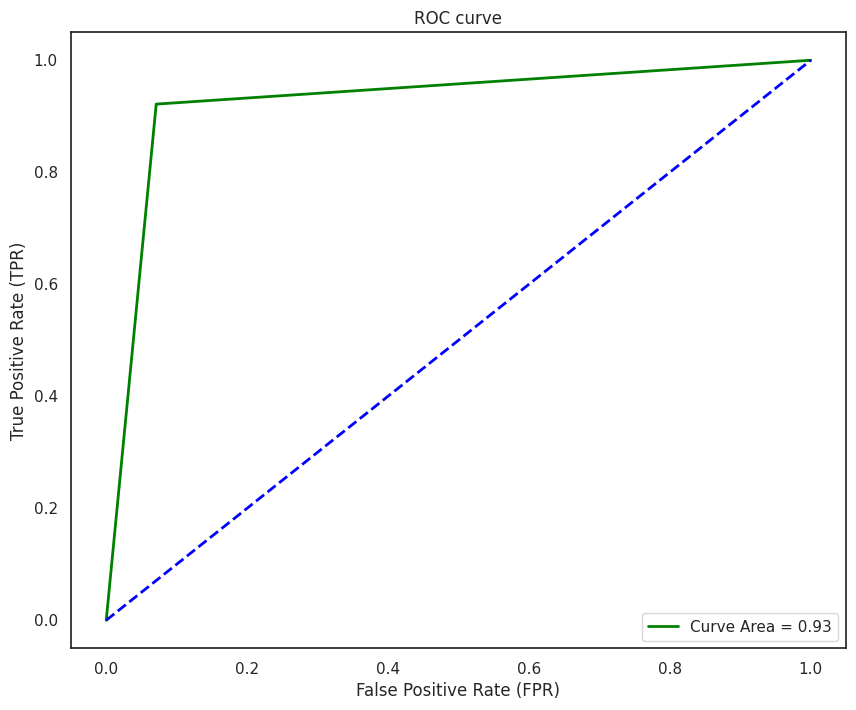

In [ ]:
fpr, tpr, thr = roc_curve(y_test, svc_pred)
auc = np.round(roc_auc_score(y_test, svc_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")

In [ ]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [ ]:
xgb_pred = xgb_model.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train,xgb_pred)
print(accuracy)

0.9816824707719258


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
xgb_acc=cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
xgb_proba=cross_val_predict(xgb_model,X_train,y_train,cv=5,method='predict_proba')

In [ ]:
xgb_acc

array([0.96191927, 0.9581112 , 0.95582635, 0.95715918, 0.9584841 ])

In [ ]:
xgb_acc.mean()

0.958300018434816

In [ ]:
xgb_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,xgb_pred)
print(accuracy)

0.9616146230007616


In [ ]:
confusion_matrix_ = confusion_matrix(y_test, xgb_pred)
print('confusion_matrix: \n', confusion_matrix_)

print(classification_report(y_test, xgb_pred))

confusion_matrix: 
 [[3160  124]
 [ 128 3153]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3284
           1       0.96      0.96      0.96      3281

    accuracy                           0.96      6565
   macro avg       0.96      0.96      0.96      6565
weighted avg       0.96      0.96      0.96      6565



In [ ]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  3160
False Negatives =  128
False Positives =  124
True Positives =  3153


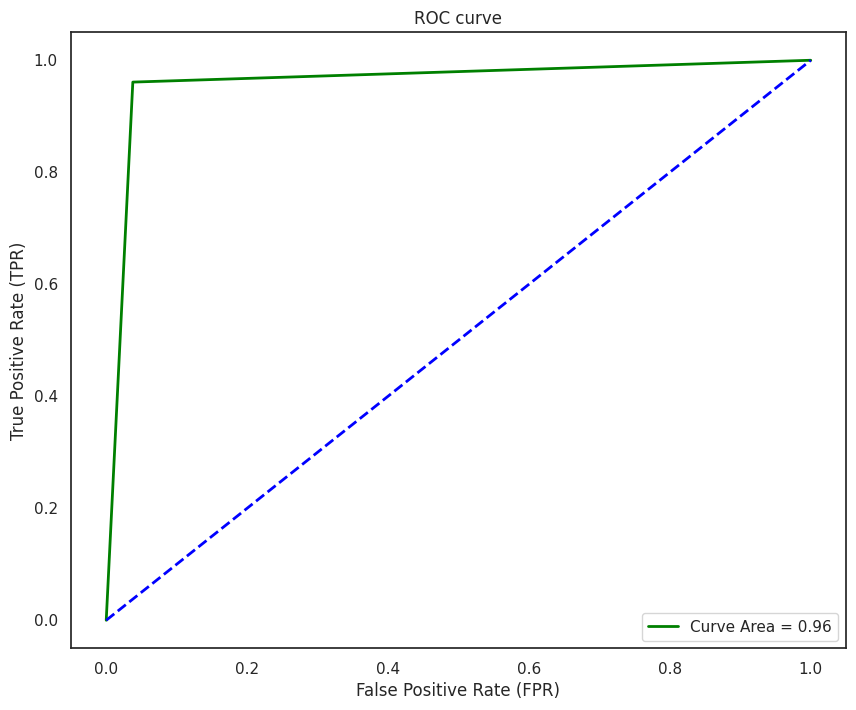

In [ ]:
fpr, tpr, thr = roc_curve(y_test, xgb_pred)
auc = np.round(roc_auc_score(y_test, xgb_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr,
         tpr,
         color='green',
         lw=2,
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models.append(('KNN', KNeighborsClassifier(leaf_size = 1, metric ='manhattan', n_neighbors = 19, weights = 'distance')))
models.append(('DTC', DecisionTreeClassifier(criterion = 'gini', max_depth = 11, max_features = 'auto', random_state=50)))
models.append(('RFC', RandomForestClassifier(random_state=50)))
models.append(('SVC', SVC(C=1000,gamma=1,random_state=50,probability=True)))
models.append(('XG Boost', XGBClassifier(objective="binary:logistic", random_state=50, eval_metric="auc")))

names = []
scores = []
rec = []
pre = []
f = []
roc = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(round((accuracy_score(y_test, y_pred)*100), 2))
    pre.append(round((precision_score(y_test,y_pred)*100), 2))
    rec.append(round((recall_score(y_test,y_pred)*100), 2))
    f.append(round((f1_score(y_test,y_pred)*100), 2))
    roc.append(round((roc_auc_score(y_test,y_pred)*100), 2))

    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuracy': scores, 'Precision': pre, 'Recall': rec, "F1-Score": f, "ROC Score": roc})
tr_split


,Name,Accuracy,Precision,Recall,F1-Score,ROC Score
0,KNN,93.36,94.05,92.56,93.30,93.36
1,DTC,94.33,95.02,93.57,94.29,94.33
2,RFC,95.20,95.19,95.21,95.20,95.20
3,SVC,92.54,92.85,92.17,92.51,92.54
4,XG Boost,96.16,96.22,96.10,96.16,96.16
